In [1]:
! pip install requests mplsoccer

In [2]:
import requests
from typing import List
from mplsoccer import Radar, grid

In [3]:
real_madrid_sofascore_ids = [
    ("Joselu", 69418),
    ("Vinicius Junior", 868812),
    ("Dani Carvajal", 138572),
    ("Federico Valverde", 831808),
    ("Jude Bellingham", 991011),
    ("Eduardo Camavinga", 973887),
    ("Ferland Mendy", 792073)
]

barcelona_sofascore_ids = [
    ("Ronald Araujo", 925097),
    ("Gavi", 1103693),
    ("Joao Cancelo", 138892),
    ("Ilkay Gundogan", 45853)
]

In [4]:
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'uk,ru-RU;q=0.9,ru;q=0.8,en-US;q=0.7,en;q=0.6',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"9f784e861d"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
}
headers['If-Modified-Since'] = 'Mon, 1 Jan 2024 00:00:00 GMT'

In [5]:
JUDE_BELLINGHAM_ID = 991011
ILKAY_GUNDOGAN_ID = 45853

In [6]:
belligham_response = requests.get(f'https://api.sofascore.com/api/v1/event/11369369/player/{JUDE_BELLINGHAM_ID}/statistics', headers=headers)
gundogan_response = requests.get(f'https://api.sofascore.com/api/v1/event/11369369/player/{ILKAY_GUNDOGAN_ID}/statistics', headers=headers)

belligham_stats = belligham_response.json()['statistics']
gundogan_stats = gundogan_response.json()['statistics']

In [7]:
# parameter names of the statistics we want to compare on the radar chart
params_bellingham_vs_gundogan = ["npxG", "Non-Penalty Goals", "xA", "Passing Accuracy", "Long Ball Accuracy",
          "Total Touches", "Sofascore Rating"]

# lower and upper bounds for the statistics
low =  [0.1, 0.0, 0.0, 0.2,  0, 50, 7.0]
high = [1.0, 2, 0.3, 1.0, 1.0, 200, 8.0]

In [8]:
bellingham_values = [belligham_stats['expectedGoals'], belligham_stats['goals'], belligham_stats['expectedAssists'], belligham_stats['accuratePass'] / belligham_stats['totalPass'], belligham_stats['accurateLongBalls'] / belligham_stats['totalLongBalls'], belligham_stats['touches'], belligham_stats['rating']]
gundogan_values = [gundogan_stats['expectedGoals'], gundogan_stats['goals'],gundogan_stats['expectedAssists'], gundogan_stats['accuratePass'] / gundogan_stats['totalPass'], gundogan_stats['accurateLongBalls'] / gundogan_stats['totalLongBalls'], gundogan_stats['touches'], gundogan_stats['rating']]

In [9]:
def plot_radar(params: List[str], low: List[float], high: List[float], first_player_values: List[float], second_player_values: List[float], first_player_name: str, second_player_name: str, first_team_name: str,  second_team_name: str):
    radar = Radar(params, low, high,
              round_int=[False] * len(params),
              num_rings=4,
              ring_width=1, 
              center_circle_radius=1)
    
    fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                    title_space=0, endnote_space=0, grid_key='radar', axis=False)

    radar.setup_axis(ax=axs['radar'])
    rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
    radar_output = radar.draw_radar_compare(first_player_values, second_player_values, ax=axs['radar'],
                                            kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                            kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output
    range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25)
    param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25)
    axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                        c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
    axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                        c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

    title1_text = axs['title'].text(0.01, 0.65, first_player_name, fontsize=25, color='#01c49d',
                                    ha='left', va='center')
    title2_text = axs['title'].text(0.01, 0.25, first_team_name, fontsize=20,
                                    ha='left', va='center', color='#01c49d')
    title3_text = axs['title'].text(0.99, 0.65, second_player_name, fontsize=25,                                    # fontproperties=robotto_bold.prop,
                                    ha='right', va='center', color='#d80499')
    title4_text = axs['title'].text(0.99, 0.25, second_team_name, fontsize=20,
                                    ha='right', va='center', color='#d80499')

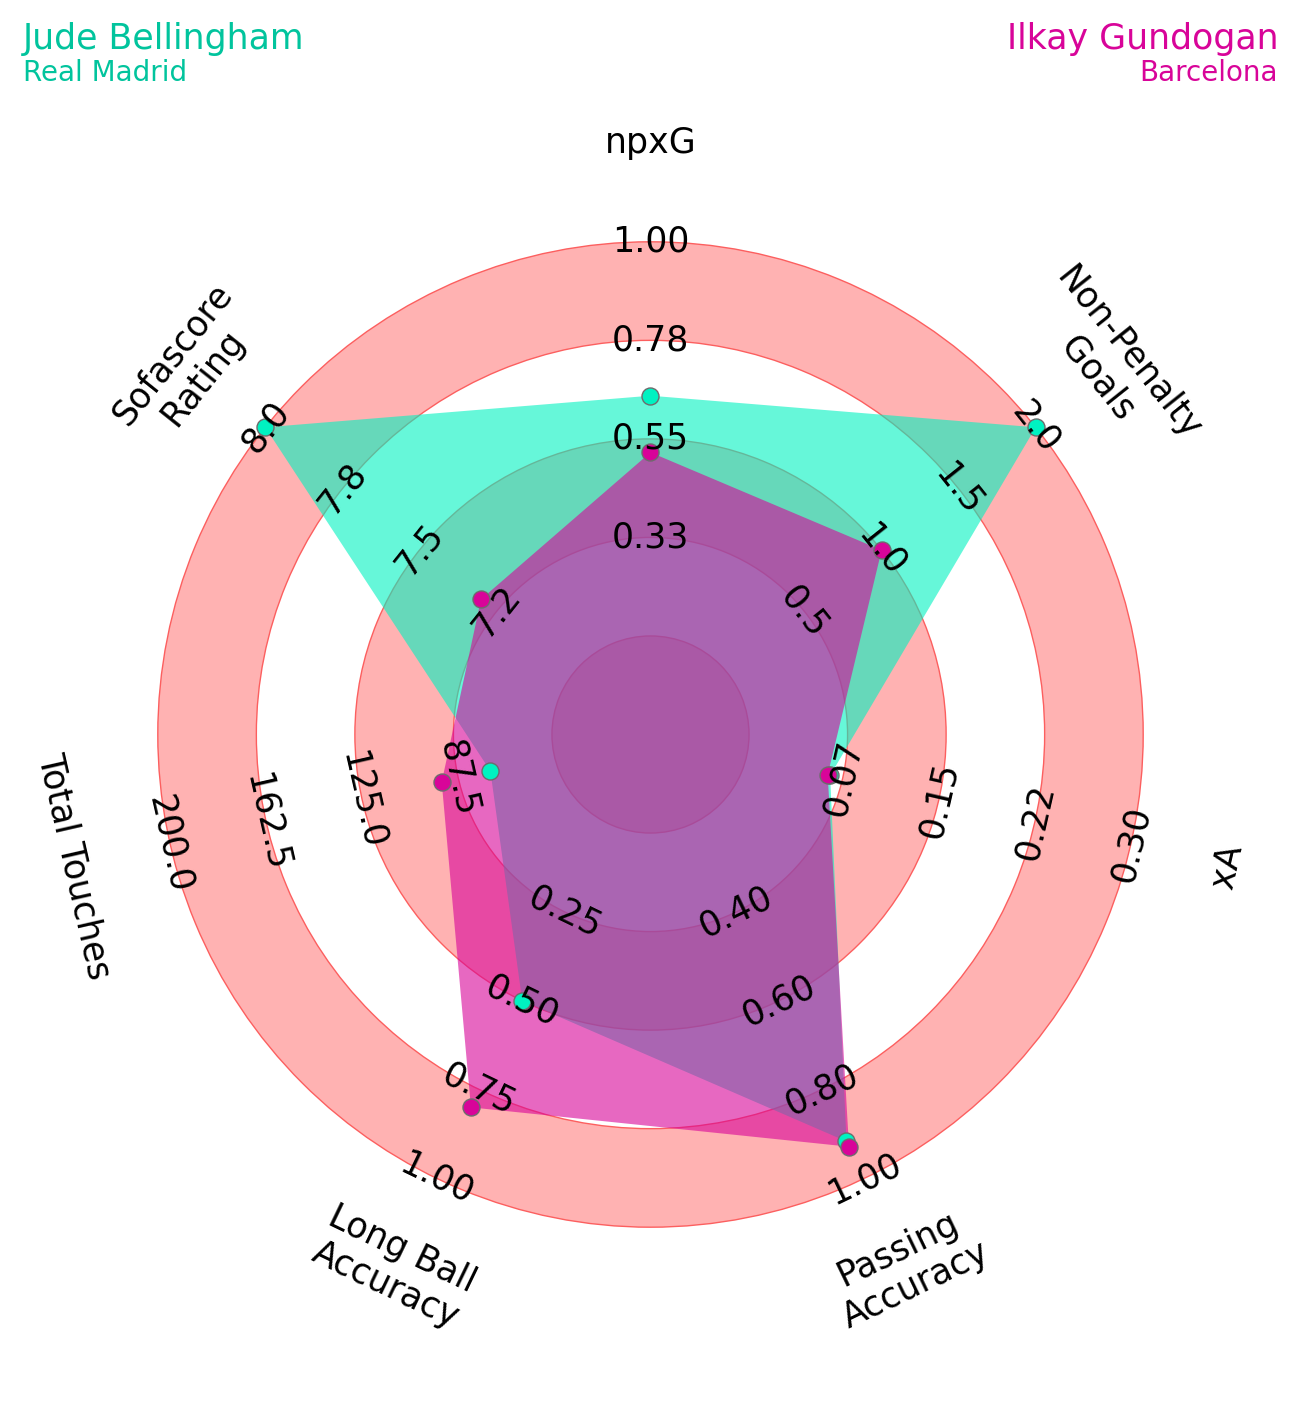

In [10]:
plot_radar(params_bellingham_vs_gundogan, low, high, bellingham_values, gundogan_values, "Jude Bellingham", "Ilkay Gundogan", "Real Madrid", "Barcelona")